In [1]:
import environ

env = environ.Env()
environ.Env.read_env()
#Todo only load the repo folder
DataSetsPath     = env('DataSetsPath')     #* get the path of the script
ModelsPath       = env('ModelsPath')       #* get the path of the script
fitToolsPath     = env('fitToolsPath') #* get the path of the script
root_Data_Input  = env('DataSet_Img_Vs_Img_InPut')         #* get the path of the dataSet
root_Data_Output = env('DataSet_Img_Vs_Img_OutPut')         #* get the path of the dataSet
root_Data_Input_Val  = env('DataSet_Img_Vs_Img_InPut_Val')         #* get the path of the dataSet
root_Data_Output_Val = env('DataSet_Img_Vs_Img_OutPut_Val')         #* get the path of the dataSet
root_Data = [root_Data_Input, root_Data_Output]
model_save_dir   = env('model_save_dir')   #* get the path where we will save the model


import sys
sys.path.append(DataSetsPath)
sys.path.append(ModelsPath)
sys.path.append(fitToolsPath)


import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


device = "cuda" if torch.cuda.is_available() else "cpu"
print("device = ", device)

device =  cuda


In [2]:
image_Height   = 572
image_Width    = 572
image_Channels = 1
batch_size     = 16

len(inPut_Images) != len(outPut_Images)
Size data set lower definition 1229
image_array.shape =  (572, 572, 3)


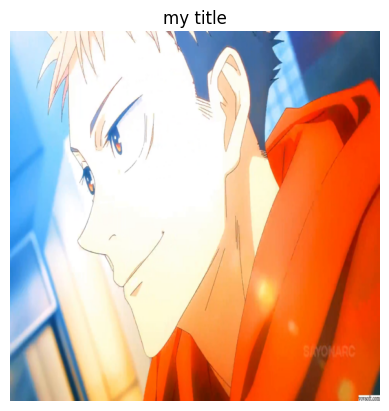

image_array.shape =  (1144, 1144, 3)


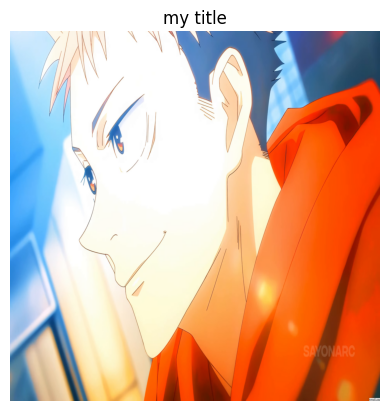

In [3]:
from DataSets.dataSet_Img_Vs_Img import DataSet_Img_To_Img
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, RandomSampler


inputResize = transforms.Compose([
                        #* Compose = compoues a list of function
                        transforms.ToPILImage(),
                        transforms.Resize((image_Height, image_Width)),
                        # transforms.RandomRotation(degrees=5),  # Randomly rotate the image by up to 5 degrees
                                        
                        #* ToPILImage = cahnge the data type from PyTorch tensor or a NumPy ndarray to : A PIL (Python Imaging Library)
                        # transforms.RandomVerticalFlip(),
                        # transforms.RandomHorizontalFlip(),
                        # transforms.RandomRotation(degrees=15),  
                        transforms.ToTensor(), 
                        #* change the data type from Numpy or PIL to tensor
                        ])

outPutResize = transforms.Compose([
                        #* Compose = compoues a list of function
                        transforms.ToPILImage(),
                        transforms.Resize((image_Height*2, image_Width*2)),
                        # transforms.RandomRotation(degrees=5),  # Randomly rotate the image by up to 5 degrees
                                        
                        #* ToPILImage = cahnge the data type from PyTorch tensor or a NumPy ndarray to : A PIL (Python Imaging Library)
                        # transforms.RandomVerticalFlip(),
                        # transforms.RandomHorizontalFlip(),
                        # transforms.RandomRotation(degrees=15),  
                        transforms.ToTensor(), 
                        #* change the data type from Numpy or PIL to tensor
                        ])


myDataSet     = DataSet_Img_To_Img(root_Data, transfor_In_img = inputResize, transfor_Out_img = outPutResize, test = False, dataSize = 100)

from toolsTest import plot_img_tensor

plot_img_tensor(myDataSet.__getitem__(3)[0])
plot_img_tensor(myDataSet.__getitem__(3)[1])


image_array.shape =  (1144, 1144, 1)


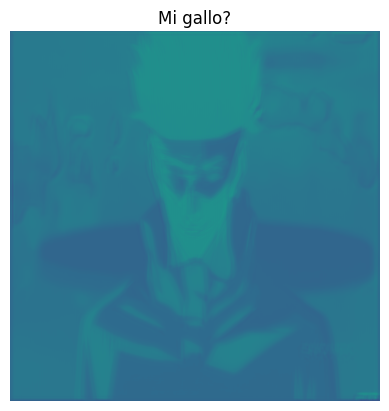

In [4]:
import importlib
import Models.models_SuperResolution

importlib.reload(Models.models_SuperResolution)
from Models.models_SuperResolution import modelSuperResolution

myModel = modelSuperResolution(2)
myModel.to(device = device)
plot_img_tensor(myModel((myDataSet.__getitem__(1)[0]).to(device)), [0], "Mi gallo?")


In [5]:
import importlib

import fitTools.fitFunctions_superResolution
importlib.reload(fitTools.fitFunctions_superResolution)
from fitTools.fitFunctions_superResolution import fitertImgToImg

import torch.nn as nn
from torch import optim
import torch.nn.functional as F


opt_model = optim.Adam(myModel.parameters(), lr = 0.001)

trainerModel = fitertImgToImg(myModel, 
                        myDataSet, 
                        device      = device,
                        batch_size = 64,
                        # criterion   = criterion, 
                        # dataSet_Val = myDataSet,
                        model_save_dir =  model_save_dir)



In [6]:
#* soft mas + crost
import torch
import torch.nn.functional as F
criterion =   torch.nn.CrossEntropyLoss()
# criterion = F.cross_entropy()

for batch_idx, (imgInput, imgOutPut) in enumerate(trainerModel.data_loader):
    imgInput  =  imgInput.to(device)
    imgOutPut = imgOutPut.to(device)
    # opt_model.zero_grad()
    modelOutPut = myModel(imgInput)
    print(modelOutPut.shape, imgOutPut.shape)
    loss = criterion(modelOutPut, imgOutPut)
    print(loss)
    break

torch.Size([64, 3, 1144, 1144]) torch.Size([64, 3, 1144, 1144])
tensor(0.8788, device='cuda:0', grad_fn=<DivBackward1>)


In [7]:
trainerModel.trainModel(opt_model = opt_model, num_epochs = 30) #* 4 epoch = 1 anime cap XD

Epoch 1/30 process: 90: 100%|██████████| 11/11 [01:42<00:00,  9.28s/it, modelLoss=0.616]


Epoch completed, TRAIN MAE 1.0147


Epoch 2/30 process: 90: 100%|██████████| 11/11 [01:39<00:00,  9.07s/it, modelLoss=0.637]


Epoch completed, TRAIN MAE 1.0161


Epoch 3/30 process: 90: 100%|██████████| 11/11 [01:39<00:00,  9.06s/it, modelLoss=0.856]


Epoch completed, TRAIN MAE 1.0343


Epoch 4/30 process: 90: 100%|██████████| 11/11 [01:39<00:00,  9.07s/it, modelLoss=0.853]


Epoch completed, TRAIN MAE 1.0332


Epoch 5/30 process: 90: 100%|██████████| 11/11 [01:39<00:00,  9.04s/it, modelLoss=0.794]


Epoch completed, TRAIN MAE 1.0278


Epoch 6/30 process: 90: 100%|██████████| 11/11 [01:39<00:00,  9.09s/it, modelLoss=0.93]


Epoch completed, TRAIN MAE 1.0403


Epoch 7/30 process: 90: 100%|██████████| 11/11 [01:41<00:00,  9.19s/it, modelLoss=0.77] 


Epoch completed, TRAIN MAE 1.0257


Epoch 8/30 process: 90: 100%|██████████| 11/11 [01:40<00:00,  9.14s/it, modelLoss=0.787]


Epoch completed, TRAIN MAE 1.0271


Epoch 9/30 process: 90: 100%|██████████| 11/11 [01:40<00:00,  9.17s/it, modelLoss=0.87] 


Epoch completed, TRAIN MAE 1.0342


Epoch 10/30 process: 90: 100%|██████████| 11/11 [01:40<00:00,  9.15s/it, modelLoss=0.776]


Epoch completed, TRAIN MAE 1.0257


Epoch 11/30 process: 90: 100%|██████████| 11/11 [01:39<00:00,  9.08s/it, modelLoss=0.664]


Epoch completed, TRAIN MAE 1.0161


Epoch 12/30 process: 90: 100%|██████████| 11/11 [01:39<00:00,  9.04s/it, modelLoss=0.702]


Epoch completed, TRAIN MAE 1.0187


Epoch 13/30 process: 90: 100%|██████████| 11/11 [01:40<00:00,  9.10s/it, modelLoss=1.1]  


Epoch completed, TRAIN MAE 1.0556


Epoch 14/30 process: 90: 100%|██████████| 11/11 [01:39<00:00,  9.04s/it, modelLoss=1.13] 


Epoch completed, TRAIN MAE 1.0571


Epoch 15/30 process: 90: 100%|██████████| 11/11 [01:39<00:00,  9.07s/it, modelLoss=0.868]


Epoch completed, TRAIN MAE 1.0328


Epoch 16/30 process: 90: 100%|██████████| 11/11 [01:39<00:00,  9.05s/it, modelLoss=0.887]


Epoch completed, TRAIN MAE 1.0352


Epoch 17/30 process: 90: 100%|██████████| 11/11 [01:39<00:00,  9.07s/it, modelLoss=0.993]


Epoch completed, TRAIN MAE 1.0443


Epoch 18/30 process: 63:  73%|███████▎  | 8/11 [01:19<00:29,  9.98s/it, modelLoss=0.847]


KeyboardInterrupt: 

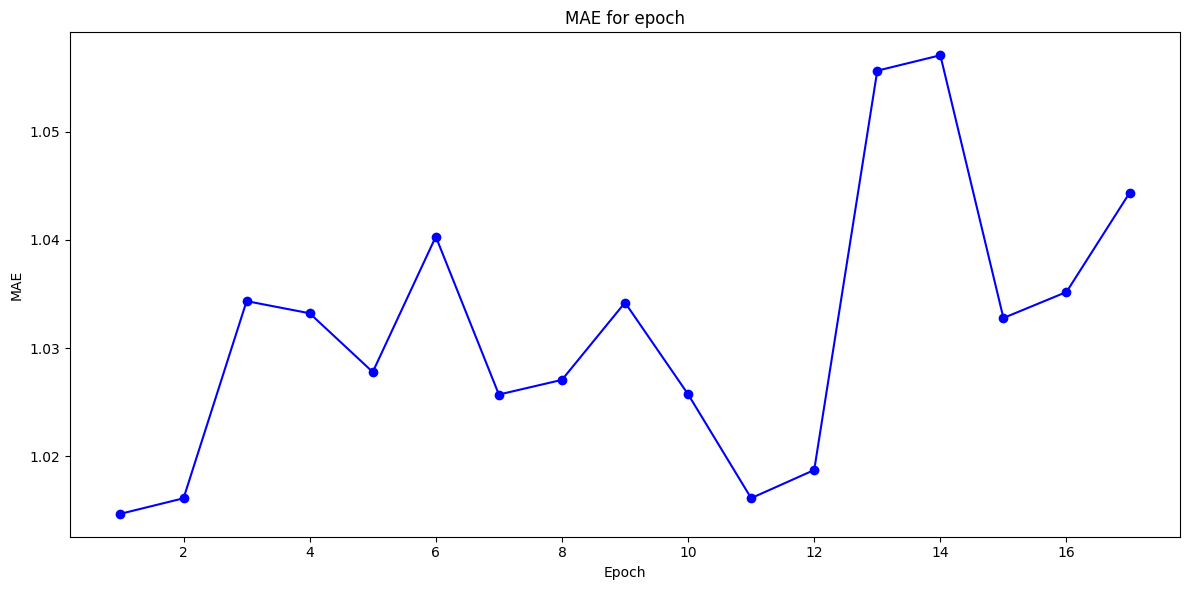

In [8]:
import matplotlib.pyplot as plt

Epochs_values     = range(1, len(trainerModel.history['train_MAE']) + 1)
# Epochs_values_Val = range(1, len(trainerModel.history['MAE_Val']) + 1)

# Create two subplots (one for MAE and one for MAE_Val) in a single row
fig, (plt1) = plt.subplots(1, 1, figsize=(12, 6))

# Plot MAE in the first subplot
plt1.plot(Epochs_values, trainerModel.history['train_MAE'], marker='o', color='blue')
plt1.set_xlabel('Epoch')
plt1.set_ylabel('MAE')
plt1.set_title('MAE for epoch')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


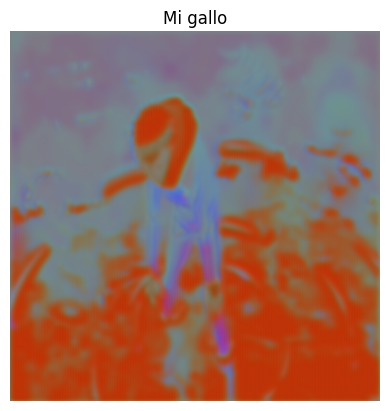

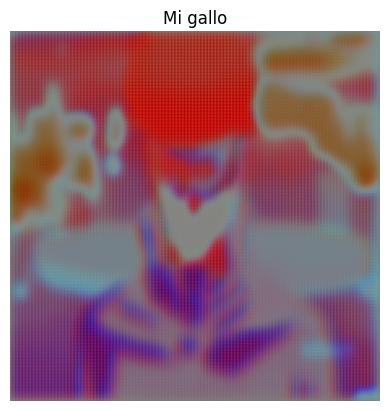

In [9]:
plot_img_tensor(myModel(myDataSet.__getitem__(1)[1].to(device)))
plot_img_tensor(myModel(myDataSet.__getitem__(1)[0].to(device)))
